In [1]:
# IMPORT DES LIBRAIRIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as st
import re

## IMPORT & READ FILE

In [2]:
df = pd.read_excel("Salaries_Data.xlsx")

## CLONING DATA (IN ORDER NOT TO RELOAD .CSV EACH TIME)

In [3]:
data = df

 ## CHECKING : STARTING NUMBER OF ROWS AND GENERAL DISPLAY

In [4]:
data

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000.0,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000.0,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000.0,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000.0,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000.0,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,9/9/2018 11:52:32,google,T4,Software Engineer,327000.0,"Seattle, WA",10.0,1.0,Distributed Systems (Back-End),155000.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
62638,9/13/2018 8:23:32,Microsoft,62,Software Engineer,237000.0,"Redmond, WA",2.0,2.0,Full Stack,146900.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
62639,9/13/2018 14:35:59,MSFT,63,Software Engineer,220000.0,"Seattle, WA",14.0,12.0,Full Stack,157000.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
62640,9/16/2018 16:10:35,Salesforce,Lead MTS,Software Engineer,280000.0,"San Francisco, CA",8.0,4.0,iOS,194688.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


## CHECKING : DATA TYPES

In [5]:
# WHAT ARE THE DIFFERENT TYPES OF DATA IN OUR DATAFRAME :
display(data.dtypes.to_frame())

,0
timestamp,object
company,object
level,object
title,object
totalyearlycompensation,float64
location,object
yearsofexperience,float64
yearsatcompany,float64
tag,object
basesalary,float64


## COLUMNS OPERATIONS


### CREATING CLEAN NEW COLUMNS FROM PREVIOUS ONES

In [6]:
# CREATING NEW COMPANY & TITLE COLUMN : to add new company column and delete the existing one

data['company_name'] = data['company'].str.upper()

# REPLACING ALL 

data['title_new'] = data["title"].str.replace(r'Soft Engineer', 'Software Engineer', regex=True)

# CREATING NEW COUNTRY & FILL MISSING VALUES WITH USA

data["country"] = data["location"].str.split(',').str[2]
data[['country']] = data[['country']].fillna(' USA')


data.head(2)

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,company_name,title_new,country
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000.0,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,ORACLE,Product Manager,USA
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000.0,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,EBAY,Software Engineer,USA


### DROPPING COLUMNS WE KNOW WE'RE NOT GONNA USE

In [7]:
# DROPPING IRRELEVANT COLUMNS OR COLUMNS WE ARE NOT USING :

dropped_data = data.drop(["title", "timestamp", "company", "Race_Asian", "Race_White", "Race_Two_Or_More","Race_Black","Race_Hispanic",
                          "Masters_Degree", "Bachelors_Degree", "Doctorate_Degree", "Highschool", "Some_College", "level", "otherdetails", "dmaid"], axis=1)

dropped_data.head(2)

,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,cityid,rowNumber,Race,Education,company_name,title_new,country
0,127000.0,"Redwood City, CA",1.5,1.5,NaN,107000.0,20000.0,10000.0,NaN,7392,1,NaN,NaN,ORACLE,Product Manager,USA
1,100000.0,"San Francisco, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,7419,2,NaN,NaN,EBAY,Software Engineer,USA


### RENAMING COLUMNS

In [8]:
# RENAMING COLUMN NAMES FOR MORE CLARITY : 

dropped_data.rename(columns = {'totalyearlycompensation': 'total_yearly_compensation', 'yearsofexperience': 'years_of_experience', 'yearsatcompany': 'years_at_company',
                       'basesalary': 'base_salary', 'stockgrantvalue': 'stock_grant_value', 'cityid': 'city_id','rowNumber': 'row_number', 'Race' : 'race', 'Education' : 'education', 'title_new' : 'title'}, inplace=True)


### REORDERING COLUMNS

In [9]:
# REORDERING OUR DATA FRAME COLUMNS TO MAKE IT MORE READABLE/EXPLOITABLE :

new_columns_order = ["row_number", "company_name", "country", "location", "city_id", "years_of_experience", "years_at_company", "title", "tag", "total_yearly_compensation", "base_salary", "stock_grant_value", "bonus",
                     "gender", "race", "education"]
reordered_data = dropped_data[new_columns_order]

reordered_data.head(2)


,row_number,company_name,country,location,city_id,years_of_experience,years_at_company,title,tag,total_yearly_compensation,base_salary,stock_grant_value,bonus,gender,race,education
0,1,ORACLE,USA,"Redwood City, CA",7392,1.5,1.5,Product Manager,NaN,127000.0,107000.0,20000.0,10000.0,NaN,NaN,NaN
1,2,EBAY,USA,"San Francisco, CA",7419,5.0,3.0,Software Engineer,NaN,100000.0,0.0,0.0,0.0,NaN,NaN,NaN


## LOCATING MISSING DATA

In [10]:
# OÙ SONT LOCALISEES LES DONNEES MANQUANTES DANS NOTRE DATAFRAME ?

reordered_data.isnull().sum()

row_number                       0
company_name                     5
country                          0
location                         3
city_id                          0
years_of_experience              0
years_at_company                 0
title                            3
tag                            854
total_yearly_compensation        3
base_salary                      1
stock_grant_value                3
bonus                            1
gender                       19540
race                         40215
education                    32272
dtype: int64

## DROPPING MISSING DATA

### COLUMNS

In [11]:
# MISSING VALUES ARE LESS THAN 2% OF THE REMAINING RELEVANT DATA
# SO WE ARE DROPPING THE CORRESPONDING ROWS

cleaned_data1 = reordered_data.dropna(subset=['company_name'])
cleaned_data2 = cleaned_data1.dropna(subset=['location'])
cleaned_data3 = cleaned_data2.dropna(subset=['title'])
cleaned_data4 = cleaned_data3.dropna(subset=['tag'])
cleaned_data5 = cleaned_data4.dropna(subset=['total_yearly_compensation'])
cleaned_data6 = cleaned_data5.dropna(subset=['base_salary'])
cleaned_data7 = cleaned_data6.dropna(subset=['stock_grant_value'])
cleaned_data8 = cleaned_data7.dropna(subset=['bonus'])

data = cleaned_data8

data.isnull().sum()

row_number                       0
company_name                     0
country                          0
location                         0
city_id                          0
years_of_experience              0
years_at_company                 0
title                            0
tag                              0
total_yearly_compensation        0
base_salary                      0
stock_grant_value                0
bonus                            0
gender                       19031
race                         39374
education                    31442
dtype: int64

### ROWS

In [12]:
# DELETING ROWS THAT ARE UNEXPLOITABLE
print(len(data))

# COUNTRIES WHICH ARE NOT
indices_to_drop1 = data.loc[data['location'] == 'Tel Aviv, Israel'].index
data = data.drop(indices_to_drop1)
print(len(data))

# YEARS OF EXPERIENCE = 0
indices_to_drop2 = data.loc[data['years_of_experience'] == 0].index
data = data.drop(indices_to_drop2)
print(len(data))

# MISGENDERING
indices_to_drop3 = data.loc[data['gender'] == "Title: Senior Software Engineer"].index
data = data.drop(indices_to_drop3)
print(len(data))

data.head(2)

61780
61778
57240
57239


,row_number,company_name,country,location,city_id,years_of_experience,years_at_company,title,tag,total_yearly_compensation,base_salary,stock_grant_value,bonus,gender,race,education
409,791,YAHOO,USA,"Sunnyvale, CA",7472,0.58,0.58,Software Engineer,Full Stack,160500.0,128000.0,13000.0,19200.0,Male,NaN,NaN
410,794,ORACLE,USA,"Redwood City, CA",7392,16.00,15.00,Software Engineering Manager,Distributed Systems (Back-End),340000.0,206000.0,134000.0,0.0,Male,NaN,NaN


### REPLACING TYPOS

In [13]:
# FROM "SOFT ENGINEER" TO "SOFTWARE ENGINEER"

# print(data['title'].value_counts())
# data['title'] = data['title'].replace('Soft Engineer', 'Software Engineer')

print(data['title'].value_counts())

data_raw = data

data.head()

Software Engineer               36717
Product Manager                  4421
Software Engineering Manager     3518
Data Scientist                   2383
Hardware Engineer                2090
Product Designer                 1482
Technical Program Manager        1371
Solution Architect               1127
Management Consultant             906
Business Analyst                  818
Marketing                         700
Sales                             457
Recruiter                         449
Mechanical Engineer               445
Human Resources                   355
Name: title, dtype: int64


,row_number,company_name,country,location,city_id,years_of_experience,years_at_company,title,tag,total_yearly_compensation,base_salary,stock_grant_value,bonus,gender,race,education
409,791,YAHOO,USA,"Sunnyvale, CA",7472,0.58,0.58,Software Engineer,Full Stack,160500.0,128000.0,13000.0,19200.0,Male,NaN,NaN
410,794,ORACLE,USA,"Redwood City, CA",7392,16.00,15.00,Software Engineering Manager,Distributed Systems (Back-End),340000.0,206000.0,134000.0,0.0,Male,NaN,NaN
411,797,QUALCOMM,USA,"Santa Clara, CA",7434,15.00,6.00,Software Engineer,Embedded Systems,240000.0,0.0,0.0,0.0,Male,NaN,NaN
412,798,SPLUNK,USA,"Seattle, WA",11527,5.00,3.00,Software Engineer,Full Stack,160000.0,0.0,0.0,0.0,Male,NaN,NaN
414,807,AMAZON,USA,"Seattle, WA",11527,5.50,5.50,Software Engineer,Distributed Systems (Back-End),240000.0,130000.0,110000.0,0.0,Male,NaN,NaN


## DEALING WITH OUTLIERS

### YEARS_OF_EXPERIENCE | TOTAL_YEARLY_COMPENSATION | BASE_SALARY | BONUS

### METHOD 1 : TINKERING AROUND

In [14]:
# YEARS OF EXPERIENCE & YEARS AT COMPANY
q = data["years_of_experience"].quantile(0.99997)
p = data["years_at_company"].quantile(0.99997)
data = data[data["years_of_experience"] < q]
data = data[data["years_at_company"] < p]
data

# YEARLY COMPENSATION
a = data["total_yearly_compensation"].quantile(0.99994)
data = data[data["total_yearly_compensation"] < a]

# BASE SALARY
b = data["base_salary"].quantile(0.99997)
data = data[data["base_salary"] < b]

# YEARLY BONUS
c = data["bonus"].quantile(0.99997)
data = data[data["bonus"] < c]

### METHOD 2 : TRYING TO IDENTIFY THEM BY VISUALIZATION

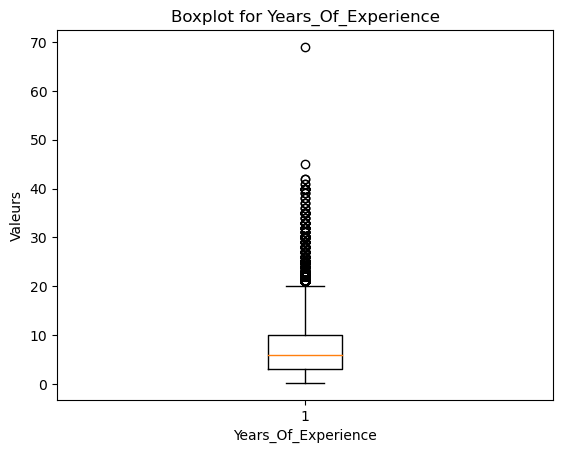

In [15]:
plt.boxplot(data_raw['years_of_experience'])

plt.title('Boxplot for Years_Of_Experience')
plt.xlabel('Years_Of_Experience')
plt.ylabel('Valeurs')
plt.ticklabel_format(style='plain', axis='y')

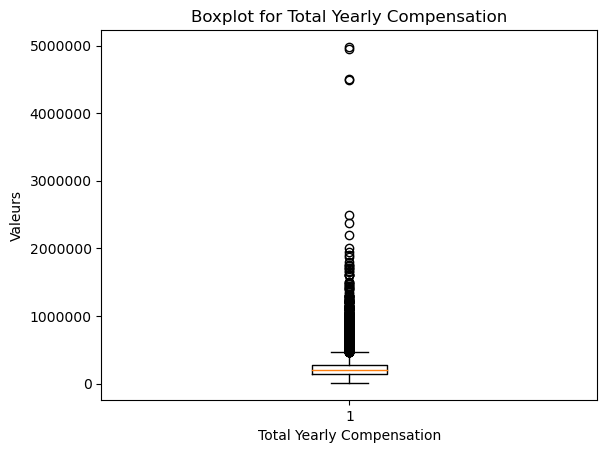

In [16]:
plt.boxplot(data_raw['total_yearly_compensation'])

plt.title('Boxplot for Total Yearly Compensation')
plt.xlabel('Total Yearly Compensation')
plt.ylabel('Valeurs')
plt.ticklabel_format(style='plain', axis='y')


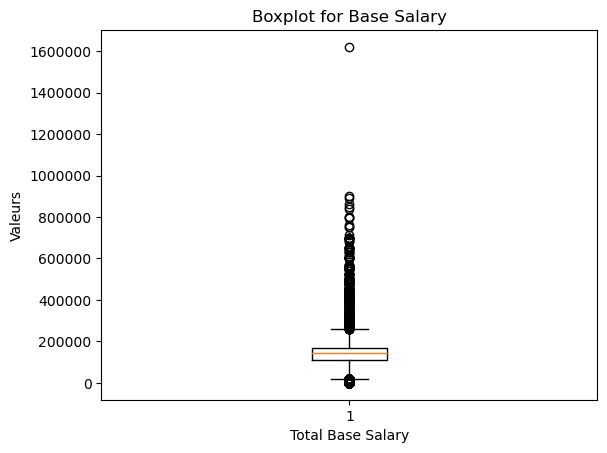

In [17]:
plt.boxplot(data_raw['base_salary'])

plt.title('Boxplot for Base Salary')
plt.xlabel('Total Base Salary')
plt.ylabel('Valeurs')
plt.ticklabel_format(style='plain', axis='y')

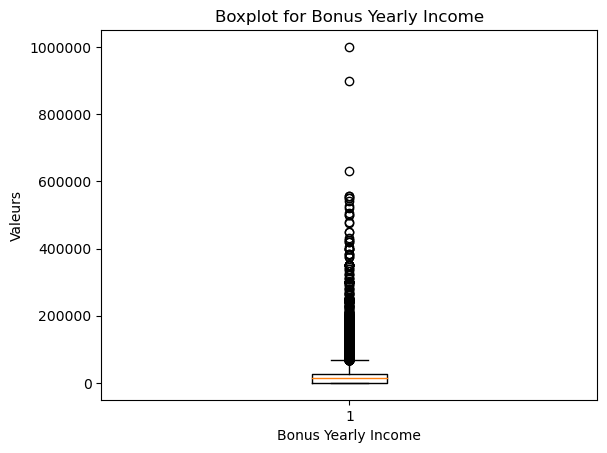

In [18]:
plt.boxplot(data_raw['bonus'])

plt.title('Boxplot for Bonus Yearly Income')
plt.xlabel('Bonus Yearly Income')
plt.ylabel('Valeurs')
plt.ticklabel_format(style='plain', axis='y')

### METHOD 3 : LEARNING ABOUT .nlargest()

In [19]:
### YEARS_OF_EXPERIENCE | TOTAL_YEARLY_COMPENSATION | BASE_SALARY | BONUS

display(data_raw["years_of_experience"].nlargest(5))
display(data_raw["years_at_company"].nlargest(5))

display(data_raw["total_yearly_compensation"].nlargest(5))

display(data_raw["base_salary"].nlargest(5))

display(data_raw["bonus"].nlargest(5))

46988    69.0
39957    45.0
9515     42.0
9615     42.0
10963    41.0
Name: years_of_experience, dtype: float64

46988    69.0
51436    40.0
7528     34.0
50149    34.0
49420    33.0
Name: years_at_company, dtype: float64

61991    4980000.0
61967    4950000.0
61982    4500000.0
61990    4490000.0
61969    2500000.0
Name: total_yearly_compensation, dtype: float64

61851    1620000.0
45054     900000.0
56175     893000.0
57701     861000.0
61967     850000.0
Name: base_salary, dtype: float64

638      1000000.0
59231     900000.0
7835      630000.0
34743     555000.0
34744     555000.0
Name: bonus, dtype: float64

In [20]:
### YEARS_OF_EXPERIENCE | TOTAL_YEARLY_COMPENSATION | BASE_SALARY | BONUS

display(data["years_of_experience"].nlargest(5))
display(data["years_at_company"].nlargest(5))

display(data["total_yearly_compensation"].nlargest(5))

display(data["base_salary"].nlargest(5))

display(data["bonus"].nlargest(5))

9515     42.0
9615     42.0
10963    41.0
11020    41.0
7084     40.0
Name: years_of_experience, dtype: float64

7528     34.0
50149    34.0
49420    33.0
61904    33.0
22638    32.0
Name: years_at_company, dtype: float64

61969    2500000.0
61987    2372000.0
61985    2200000.0
61972    2000000.0
61974    1950000.0
Name: total_yearly_compensation, dtype: float64

56175    893000.0
57701    861000.0
56529    840000.0
36746    800000.0
37462    800000.0
Name: base_salary, dtype: float64

7835     630000.0
34743    555000.0
34744    555000.0
6259     550000.0
20132    550000.0
Name: bonus, dtype: float64

In [21]:
missing_values_sum = data['total_yearly_compensation'].isnull().sum()
missing_values = data['total_yearly_compensation'].isnull()

print("Number of missing value(s) is : ", missing_values_sum)
# display(missing_values)

Number of missing value(s) is :  0


## FILLING UP THE MISSING TOTAL_YEARLY_COMPENSATION WITH AN AVERAGE


In [22]:
 # CREATING A DICTIONARY TO ACCESS THEM
average_yearly_compensation = {
    "Business_Analyst": 103505.08,
    "Data_Scientist": 138054.69,
    "Hardware_Engineer": 139628.18,
    "Human_Resources": 128590.66,
    "Management Consultant": 136195.7,
    "Marketing": 140957.75,
    "Mechanical_Engineer": 118455.1,
    "Product_Designer": 137188.12,
    "Product_Manager": 148230.71,
    "Recruiter": 117496.67,
    "Sales": 118470.72,
    "Software_Engineer": 132367.29,
    "Software_Engineering_Manager": 174007.22,
    "Solution Architect": 140173.51,
    "Technical Program Manager": 156454.74,
}

# WHERE ARE THE MISSING VALUES AT?
missing_values = data["total_yearly_compensation"].isnull()

# REPLACING MISSING VALUES IN TOTAL_YEARLY_COMPENSATION TITLE WITH AN AVERAGE OF THE SALARY BASED ON A PERSON'S POSITION "TITLE"
for index, row in data[missing_values].iterrows():
    title = row["title"]
    mean_salary = average_yearly_compensation.get(title)
    if mean_salary is not None:
        data.loc[index, "total_yearly_compensation"] = mean_salary

# CHECKING IF IT WENT WELL
print("The number of remaining yearly_compensation is :", data["total_yearly_compensation"].isnull().sum())


The number of remaining yearly_compensation is : 0


## FINAL CHECKS ON DATA SET BEFORE EXPORT

In [23]:
data.head(5)

,row_number,company_name,country,location,city_id,years_of_experience,years_at_company,title,tag,total_yearly_compensation,base_salary,stock_grant_value,bonus,gender,race,education
409,791,YAHOO,USA,"Sunnyvale, CA",7472,0.58,0.58,Software Engineer,Full Stack,160500.0,128000.0,13000.0,19200.0,Male,NaN,NaN
410,794,ORACLE,USA,"Redwood City, CA",7392,16.00,15.00,Software Engineering Manager,Distributed Systems (Back-End),340000.0,206000.0,134000.0,0.0,Male,NaN,NaN
411,797,QUALCOMM,USA,"Santa Clara, CA",7434,15.00,6.00,Software Engineer,Embedded Systems,240000.0,0.0,0.0,0.0,Male,NaN,NaN
412,798,SPLUNK,USA,"Seattle, WA",11527,5.00,3.00,Software Engineer,Full Stack,160000.0,0.0,0.0,0.0,Male,NaN,NaN
414,807,AMAZON,USA,"Seattle, WA",11527,5.50,5.50,Software Engineer,Distributed Systems (Back-End),240000.0,130000.0,110000.0,0.0,Male,NaN,NaN


In [24]:
data.isnull().sum()

row_number                       0
company_name                     0
country                          0
location                         0
city_id                          0
years_of_experience              0
years_at_company                 0
title                            0
tag                              0
total_yearly_compensation        0
base_salary                      0
stock_grant_value                0
bonus                            0
gender                       17660
race                         36296
education                    28895
dtype: int64

## EXPORTING CLEAN DATA AS .CSV

In [25]:
#data.to_csv("New_Salaries_Data2.csv", sep = ";", index = False)

In [27]:
import pymysql.cursors
from sqlalchemy import create_engine
from sqlalchemy import text

In [28]:
import getpass
sql_pass = getpass.getpass()

········


In [29]:
connection_string = 'mysql+pymysql://root:' + sql_pass + '@localhost:3306/'
engine = create_engine(connection_string)

In [30]:
data.to_sql('project_3_cleaning_data', engine, 'project_3', if_exists='replace', index=True)

57228